In [137]:
import pandas as pd
import pyodbc
from dotenv import load_dotenv
import os

In [138]:
from utils import get_grouped_df

df = get_grouped_df()

/home/apprenant/Documents/DEV_IA/Predictif_des_Entrees_de_Films/notebooks/utils.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


# **Analyse exploratoire**

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df.head()

,title,entries,date,realisateur,budget,titre_non_modifie,film_id,nom_acteur,nom_compagnie,nom_genre
0,#chef,13798,2014-10-29,Jon Favreau,11000000,#Chef,1888,"John Leguizamo, Jon Favreau, Sofía Vergara, Em...","Altus Media, Fairview Entertainment, Prescience",Comédie
1,#piresoiree,66666,2017-08-02,Lucia Aniello,20000000,# Pire Soirée,2260,"Scarlett Johansson, Jillian Bell, Ilana Glazer...","Paulilu Productions, Sony Pictures, Columbia P...","Drame, Comédie"
2,(500)joursensemble,82432,2009-09-30,Marc Webb,7500000,(500) jours ensemble,844,"Zooey Deschanel, Joseph Gordon-Levitt, Chloë G...","Fox Searchlight Pictures, Watermark Pictures, ...","Comédie, Drame, Romance"
3,100%cachemire,197125,2013-12-11,Valérie Lemercier,1400000,100% cachemire,1680,"Nanou Garcia, Gilles Lellouche, Valérie Lemerc...","SCOPE Pictures, Rectangle Productions",Comédie
4,10000,474853,2008-03-12,Roland Emmerich,105000000,10 000,606,"Cliff Curtis, Steven Strait, Nathanael Baring,...","Centropolis Entertainment, Legendary Pictures,...","Aventure, Action, Drame, Fantastique"


In [141]:
df.shape

(2746, 10)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              2746 non-null   object
 1   entries            2746 non-null   int64 
 2   date               2746 non-null   object
 3   realisateur        2746 non-null   object
 4   budget             2746 non-null   int64 
 5   titre_non_modifie  2746 non-null   object
 6   film_id            2746 non-null   int64 
 7   nom_acteur         2746 non-null   object
 8   nom_compagnie      2746 non-null   object
 9   nom_genre          2746 non-null   object
dtypes: int64(3), object(7)
memory usage: 214.7+ KB


In [143]:
df.describe()

,entries,budget,film_id
count,2.746000e+03,2.746000e+03,2746.000000
mean,3.218220e+05,4.635165e+07,1373.500000
std,4.437694e+05,5.288492e+07,792.846244
min,3.100000e+01,1.016549e+06,1.000000
25%,6.837600e+04,1.000000e+07,687.250000
50%,1.695785e+05,2.600000e+07,1373.500000
75%,3.771032e+05,6.175000e+07,2059.750000
max,4.378720e+06,4.600000e+08,2746.000000


## **Acteur**

### Top 30 des acteurs les plus fréquents

In [144]:
# Diviser la colonne 'nom_acteur' en plusieurs colonnes
df['nom_acteur'] = df['nom_acteur'].str.split(', ')
actors_df = df['nom_acteur'].apply(pd.Series)

# Compter le nombre d'occurrences de chaque acteur
actors_count = actors_df.stack().value_counts()

# Top 10 des acteurs les plus fréquents
top_actors = actors_count.nlargest(30)

In [145]:
top_actors

Matt Damon             31
Morgan Freeman         31
Mark Wahlberg          27
Jason Statham          27
Scarlett Johansson     26
Samuel L. Jackson      25
Hugh Jackman           25
Nicole Kidman          25
Nicolas Cage           24
Liam Neeson            24
Robert De Niro         24
Dwayne Johnson         24
Bruce Willis           24
Steve Carell           23
Johnny Depp            23
Colin Farrell          23
Ewan McGregor          23
Ryan Reynolds          22
Brad Pitt              22
Cate Blanchett         22
Tom Hanks              22
Charlize Theron        21
Gerard Butler          21
Will Smith             21
Rachel Weisz           20
Matthew McConaughey    20
Michael Fassbender     20
Christian Bale         19
Cameron Diaz           19
Angelina Jolie         19
dtype: int64

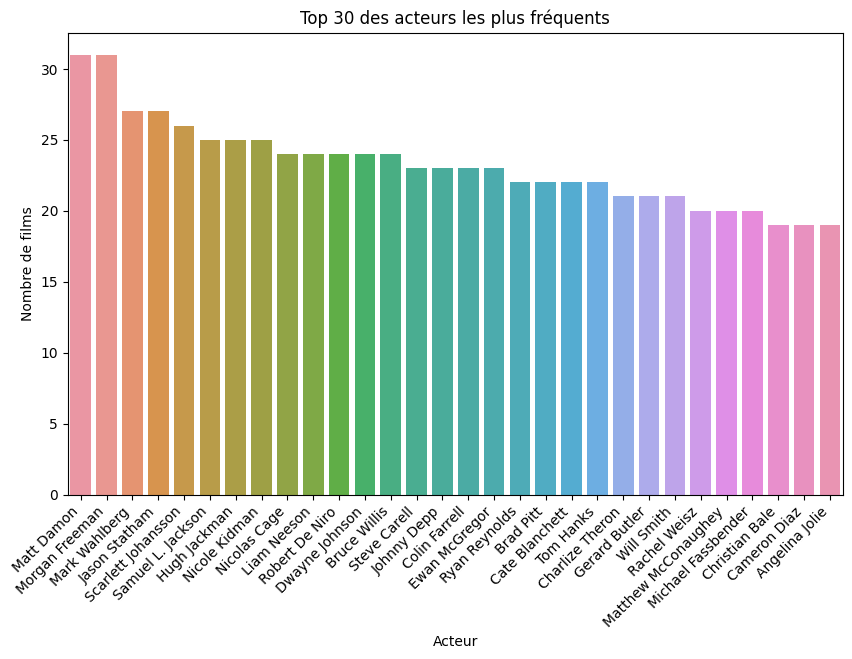

In [146]:
# Visualisation des acteurs les plus fréquents
plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.index, y=top_actors.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Acteur')
plt.ylabel('Nombre de films')
plt.title('Top 30 des acteurs les plus fréquents')
plt.show()

### Entrée en fonction des acteurs

In [147]:
## Utiliser la fonction "explode" pour transformer les listes en lignes individuelles tout en gardant les autres colonnes associées
df_exploded = df.explode('nom_acteur')

# Grouper le dataframe par acteur et calculer le nombre moyen d'entrées par film pour chaque acteur
actors_mean_entries = df_exploded.groupby('nom_acteur')['entries'].mean()

# Top 30 des acteurs ayant réalisé le plus d'entrées
top_30_actors = actors_mean_entries.nlargest(30)

print("Nombre moyen d'entrées par film pour chaque acteur :")
print(actors_mean_entries)




Nombre moyen d'entrées par film pour chaque acteur :
nom_acteur
50 Cent                         257269.0
A$AP Rocky                       24466.0
A.J. Cook                       333830.0
ABRA                             19885.0
Aamir Khan                        1958.0
                                  ...   
Ólafur Darri Ólafsson           133796.5
Óscar Barberán                   96091.0
Óscar Zafra                     251117.0
Þorbjörg Helga Þorgilsdóttir      6491.0
Þorsteinn Bachmann                9073.0
Name: entries, Length: 4616, dtype: float64


In [159]:
# Utiliser la fonction "explode" pour transformer les listes en lignes individuelles tout en gardant les autres colonnes associées
df_exploded = df.explode('nom_acteur')

# Grouper le dataframe par acteur et calculer le nombre total d'entrées pour chaque acteur
actors_total_entries = df_exploded.groupby('nom_acteur')['entries'].sum()

# Top 30 des acteurs ayant réalisé le plus d'entrées
top_30_actors = actors_total_entries.nlargest(30)

print("Top 30 des acteurs ayant réalisé le plus d'entrées :")
print(top_30_actors)

Top 30 des acteurs ayant réalisé le plus d'entrées :
nom_acteur
Robert Downey Jr.     19029959
Emma Watson           18069339
Daniel Radcliffe      16898050
Chris Hemsworth       16082245
Rupert Grint          16077869
Johnny Depp           15500998
Chris Evans           14263311
Matt Damon            14228542
Daniel Craig          13816232
Mark Ruffalo          13796465
Ian McKellen          13253114
Leonardo DiCaprio     12998574
Tom Cruise            12715546
Morgan Freeman        12209044
Scarlett Johansson    12146960
Dwayne Johnson        12026674
Hugh Jackman          11904640
Will Smith            11900978
Brad Pitt             11830358
Jason Statham         11634525
Cameron Diaz          11508719
Tom Hanks             11433963
Cate Blanchett        11135044
Michelle Rodriguez    11125190
Robert Pattinson      10406650
Vin Diesel            10405169
Adam Driver           10206074
Jack Black            10126083
Franck Dubosc         10005851
Mark Wahlberg          9969868
Name: 

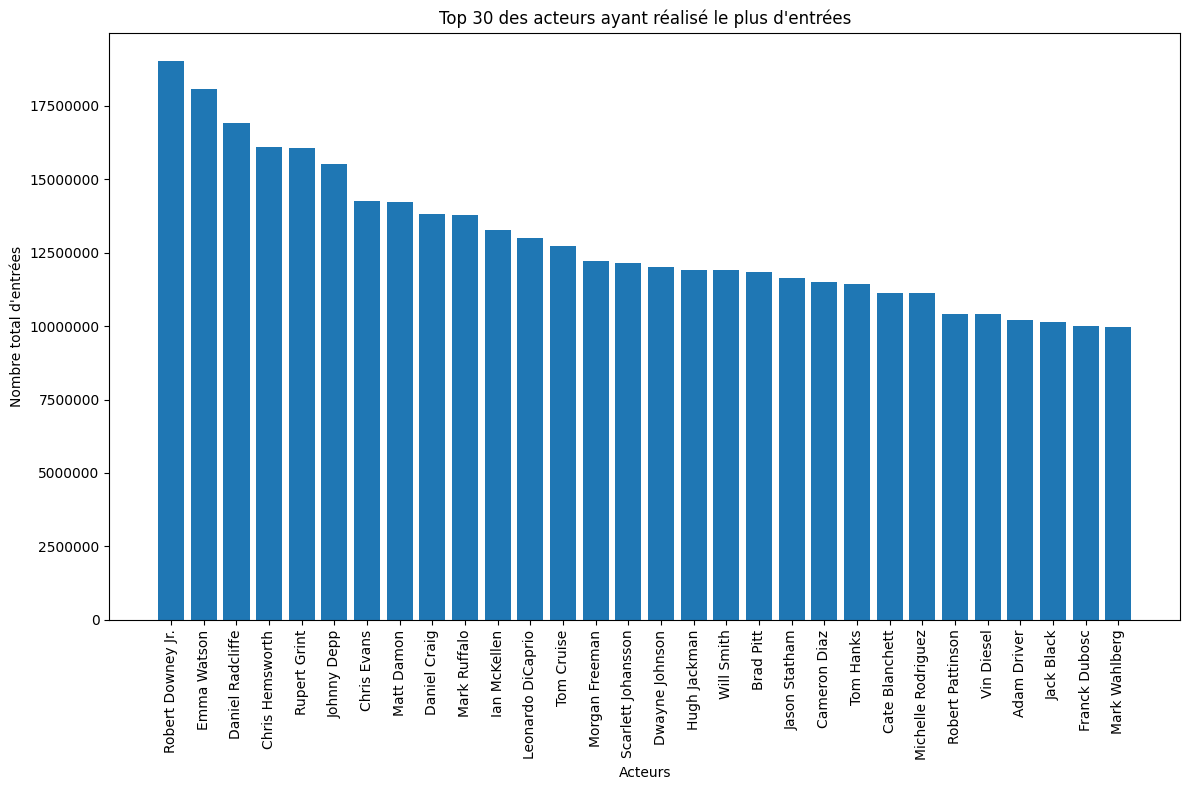

In [169]:
# Créer un graphique barre pour visualiser le top 30 des acteurs ayant réalisé le plus d'entrées
plt.figure(figsize=(12, 8))
plt.bar(top_30_actors.index, top_30_actors.values)
plt.xlabel('Acteurs')
plt.ylabel('Nombre total d\'entrées')
plt.title('Top 30 des acteurs ayant réalisé le plus d\'entrées')
plt.xticks(rotation=90)
plt.ticklabel_format(style="plain", axis="y")  # Afficher les valeurs réelles sur l'axe des y
plt.tight_layout()
plt.show()

# **Compagnies de production**

### Top 30 des compagnies de production

In [148]:
# Diviser la colonne 'nom_compagnie' en plusieurs colonnes
df['nom_compagnie'] = df['nom_compagnie'].str.split(', ')
companies_df = df['nom_compagnie'].apply(pd.Series)

# Compter le nombre d'occurrences de chaque compagnie de production
companies_count = companies_df.stack().value_counts()

# Top 10 des compagnies de production les plus fréquentes
top_companies = companies_count.nlargest(30)

In [149]:
top_companies

Universal Pictures           234
Warner Bros. Pictures        194
Columbia Pictures            166
Canal+                       151
20th Century Fox             143
Paramount                    137
New Line Cinema               99
Lionsgate                     99
Relativity Media              92
StudioCanal                   89
Walt Disney Pictures          79
Summit Entertainment          79
France 2 Cinéma               73
Focus Features                71
Metro-Goldwyn-Mayer           70
DreamWorks Pictures           69
TSG Entertainment             61
TF1 Films Production          59
Village Roadshow Pictures     57
Dune Entertainment            52
France 3 Cinéma               50
Ciné+                         50
Pathé                         47
Working Title Films           46
The Weinstein Company         44
EuropaCorp                    44
ARTE France Cinéma            44
Blumhouse Productions         44
Regency Enterprises           43
Fox Searchlight Pictures      42
dtype: int

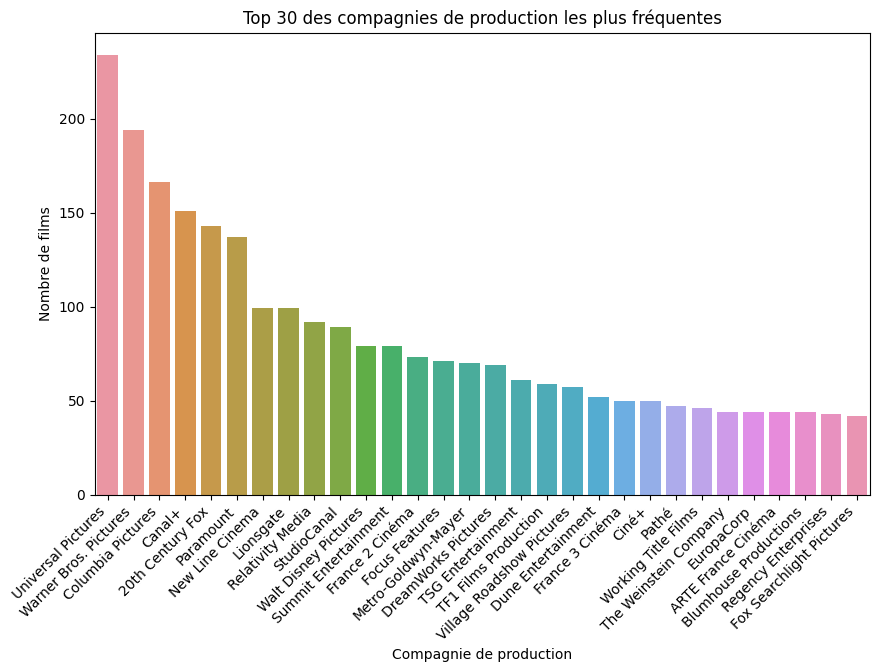

In [150]:
# Visualisation des compagnies de production les plus fréquentes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Compagnie de production')
plt.ylabel('Nombre de films')
plt.title('Top 30 des compagnies de production les plus fréquentes')
plt.show()

### Top 30 des compagnies ayant réalisé le plus d'entrées

Top 30 des compagnies ayant réalisé le plus d'entrées :
nom_compagnie
Warner Bros. Pictures        100175582
Universal Pictures            85552672
20th Century Fox              76812087
Columbia Pictures             70165740
Paramount                     63678954
Walt Disney Pictures          55293529
Canal+                        53320207
TF1 Films Production          45256601
New Line Cinema               37110283
Marvel Studios                35772718
DreamWorks Pictures           29113002
Metro-Goldwyn-Mayer           28788543
Summit Entertainment          27477054
StudioCanal                   25497845
Heyday Films                  25451807
DreamWorks Animation          24948922
Dune Entertainment            24755858
Village Roadshow Pictures     24604656
TSG Entertainment             24584504
Lionsgate                     23927610
Relativity Media              23407512
EuropaCorp                    22365464
Amblin Entertainment          21851121
Legendary Pictures            214

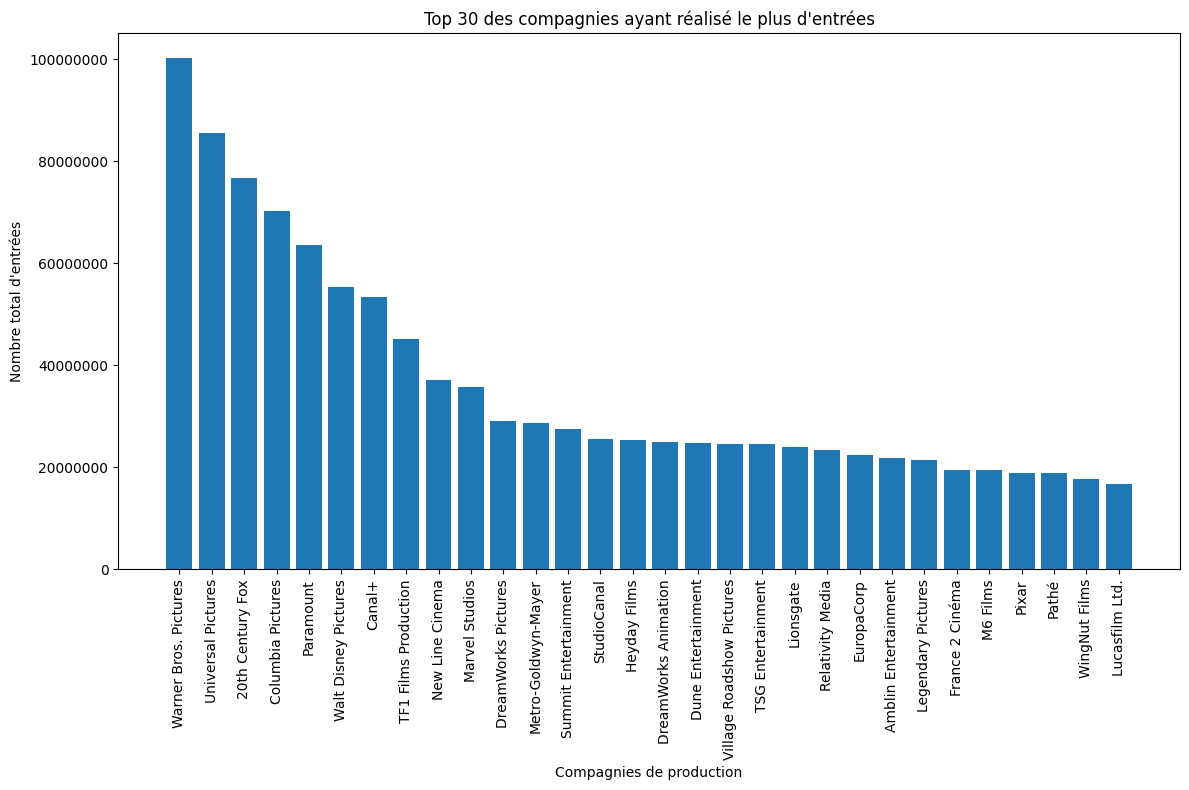

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Utiliser la fonction "explode" pour transformer les listes en lignes individuelles
df_exploded = df.explode('nom_compagnie')

# Grouper le dataframe par compagnie de production et calculer le nombre total d'entrées pour chaque compagnie
companies_total_entries = df_exploded.groupby('nom_compagnie')['entries'].sum()

# Top 30 des compagnies ayant réalisé le plus d'entrées
top_30_companies = companies_total_entries.nlargest(30)

print("Top 30 des compagnies ayant réalisé le plus d'entrées :")
print(top_30_companies)

# Créer un graphique barre pour visualiser le top 30 des compagnies ayant réalisé le plus d'entrées
plt.figure(figsize=(12, 8))
plt.bar(top_30_companies.index, top_30_companies.values)
plt.xlabel('Compagnies de production')
plt.ylabel('Nombre total d\'entrées')
plt.title('Top 30 des compagnies ayant réalisé le plus d\'entrées')
plt.xticks(rotation=90)
plt.ticklabel_format(style="plain", axis="y")  # Afficher les valeurs réelles sur l'axe des y
plt.tight_layout()
plt.show()

### Distribution des entrées pour chaque film

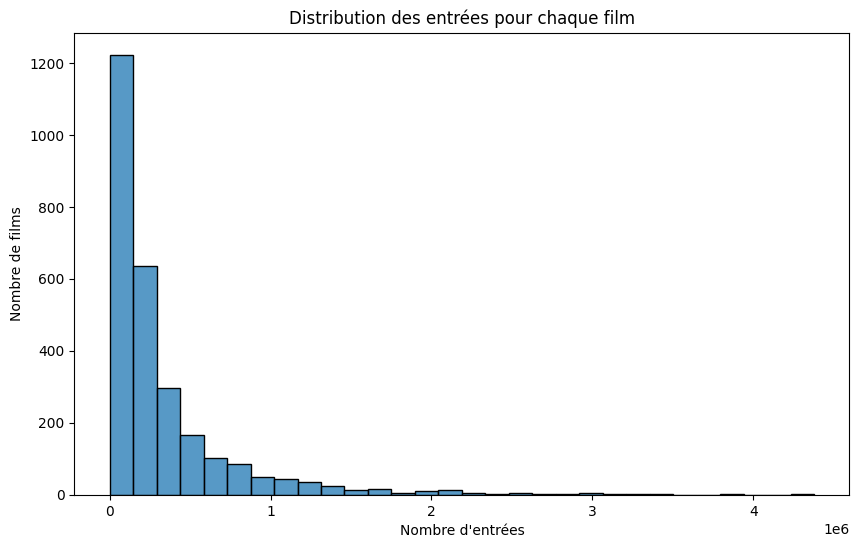

In [151]:
# Visualisation de la distribution des entrées (nombre d'entrées pour chaque film)
plt.figure(figsize=(10, 6))
sns.histplot(df['entries'], bins=30)
plt.xlabel('Nombre d\'entrées')
plt.ylabel('Nombre de films')
plt.title('Distribution des entrées pour chaque film')
plt.show()

# **Genres**

### Distribution des genres de films

Drame              1319
Comédie             873
Thriller            755
Action              740
Aventure            588
Crime               408
Romance             403
Fantastique         341
Familial            335
Science-Fiction     323
Horreur             293
Mystère             275
Animation           247
Histoire            176
Guerre               93
Musique              63
Western              35
Documentaire         22
                      1
dtype: int64


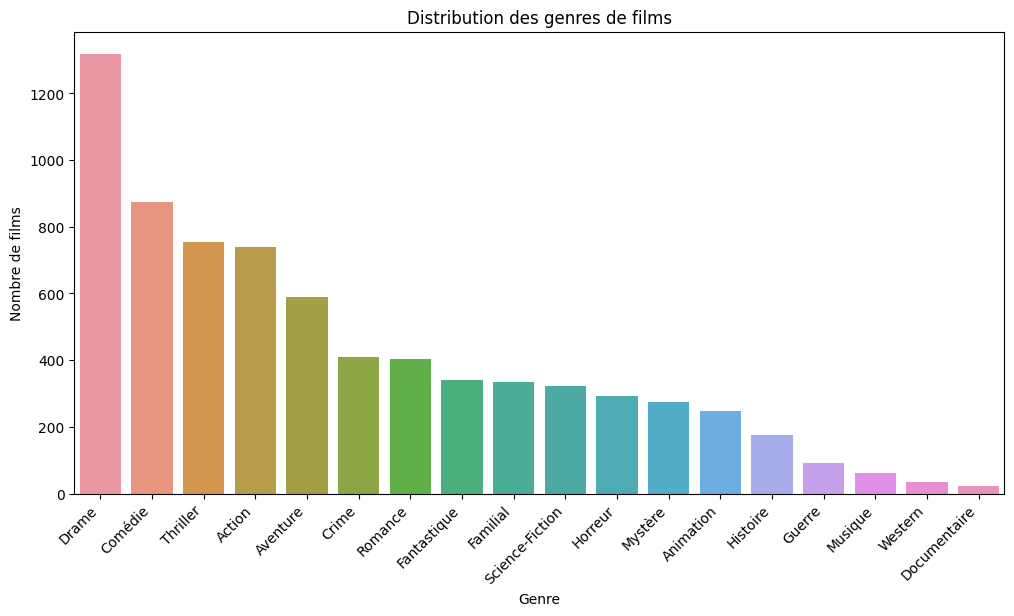

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Concaténer toutes les listes de genres en une seule liste
genres_liste = df['nom_genre'].str.split(', ').sum()

# Créer une série pandas avec les genres comme index et compter les occurrences de chaque genre
genres_counts = pd.Series(genres_liste).value_counts()

# Afficher le nombre d'occurrences de chaque genre
print(genres_counts)

import matplotlib.pyplot as plt

# Supprimer l'entrée vide dans le résultat du comptage
genres_counts = genres_counts.drop('')

# Créer le barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_counts.index, y=genres_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Nombre de films')
plt.title('Distribution des genres de films')
plt.show()

### Top 30 des genres ayant réalisé le plus d'entrées

nom_genre
Comédie                                        44242510
Action, Aventure, Science-Fiction              27845222
Drame                                          23237010
Aventure, Action, Science-Fiction              21885656
Comédie, Romance                               18849118
Action, Aventure, Fantastique                  17067423
Aventure, Fantastique, Action                  16023360
Drame, Romance                                 12692661
Comédie, Drame, Romance                        11966780
Aventure, Fantastique                          11391233
Comédie, Drame                                 10975161
Science-Fiction, Action, Aventure              10419417
Action, Crime, Thriller                         8716705
Horreur, Thriller                               7488865
Action, Comédie                                 7481611
Action, Thriller                                7262520
Action, Thriller, Crime                         7025643
Aventure, Science-Fiction, Action     

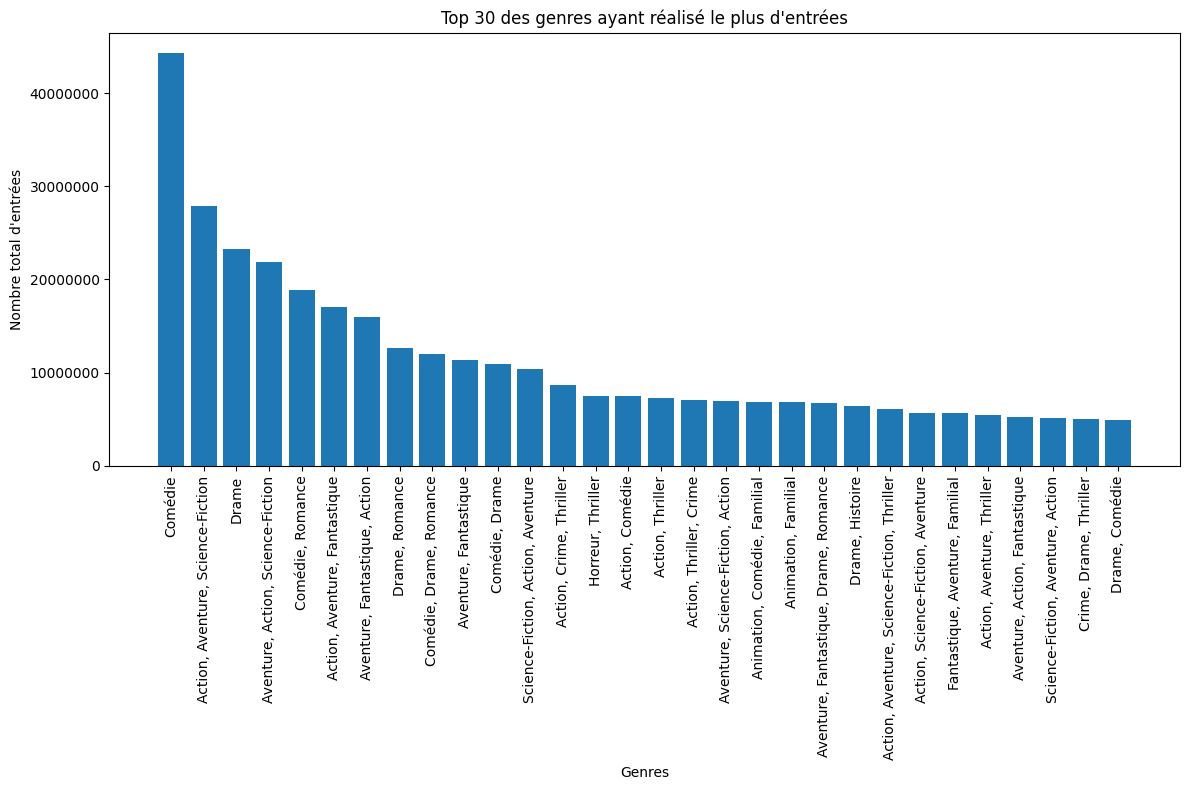

In [172]:
# Utiliser la fonction "explode" pour transformer les listes en lignes individuelles tout en gardant les autres colonnes associées
df_exploded = df.explode('nom_genre')

# Grouper le dataframe par genre et calculer le nombre total d'entrées pour chaque genre
genres_total_entries = df_exploded.groupby('nom_genre')['entries'].sum()

# Top 30 des genres ayant réalisé le plus d'entrées
top_30_genres = genres_total_entries.nlargest(30)
print(top_30_genres)

# Créer un graphique barre pour visualiser le top 30 des genres ayant réalisé le plus d'entrées
plt.figure(figsize=(12, 8))
plt.bar(top_30_genres.index, top_30_genres.values)
plt.xlabel('Genres')
plt.ylabel('Nombre total d\'entrées')
plt.title('Top 30 des genres ayant réalisé le plus d\'entrées')
plt.xticks(rotation=90)
plt.ticklabel_format(style="plain", axis="y")  # Afficher les valeurs réelles sur l'axe des y
plt.tight_layout()
plt.show()

# **Réalisateur**

### Top 30 des réalisateurs les plus fréquents

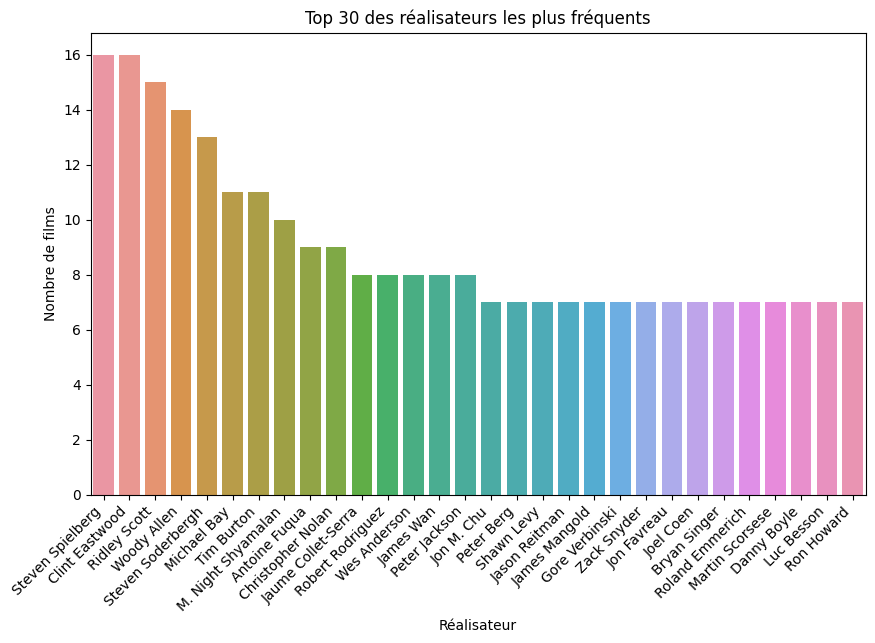

In [153]:
# Visualisation des réalisateurs les plus fréquents
plt.figure(figsize=(10, 6))
top_directors = df['realisateur'].value_counts().nlargest(30)
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Réalisateur')
plt.ylabel('Nombre de films')
plt.title('Top 30 des réalisateurs les plus fréquents')
plt.show()

### Les 30 meilleurs moyennes de nombre d'entrée par réalisateur

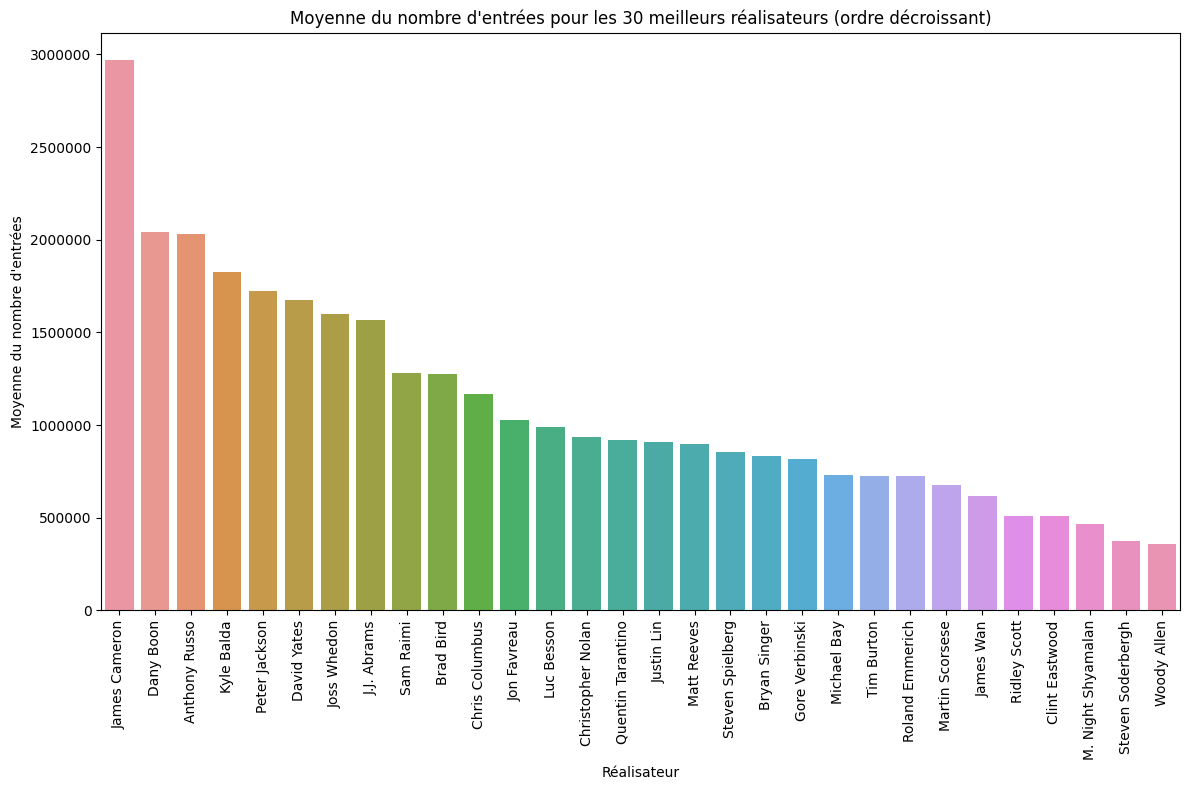

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenir le nombre d'entrées pour chaque réalisateur
entries_by_director = df.groupby('realisateur')['entries'].sum().nlargest(30)

# Obtenir la moyenne du nombre d'entrées pour chaque réalisateur parmi les 30 meilleurs
mean_entries_by_director = df[df['realisateur'].isin(entries_by_director.index)].groupby('realisateur')['entries'].mean()

# Trier les moyennes dans l'ordre décroissant
mean_entries_by_director = mean_entries_by_director.sort_values(ascending=False)

# Créer un graphique à barres pour la moyenne du nombre d'entrées des 30 meilleurs réalisateurs
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_entries_by_director.index, y=mean_entries_by_director.values, order=mean_entries_by_director.index)
plt.xticks(rotation=90)
plt.xlabel('Réalisateur')
plt.ylabel('Moyenne du nombre d\'entrées')
plt.title('Moyenne du nombre d\'entrées pour les 30 meilleurs réalisateurs (ordre décroissant)')
plt.ticklabel_format(style="plain", axis="y")  # Afficher les valeurs réelles sur l'axe des y
plt.tight_layout()
plt.show()


# **Budget**

### Corrélation entre le budget et le nombre d'entrées

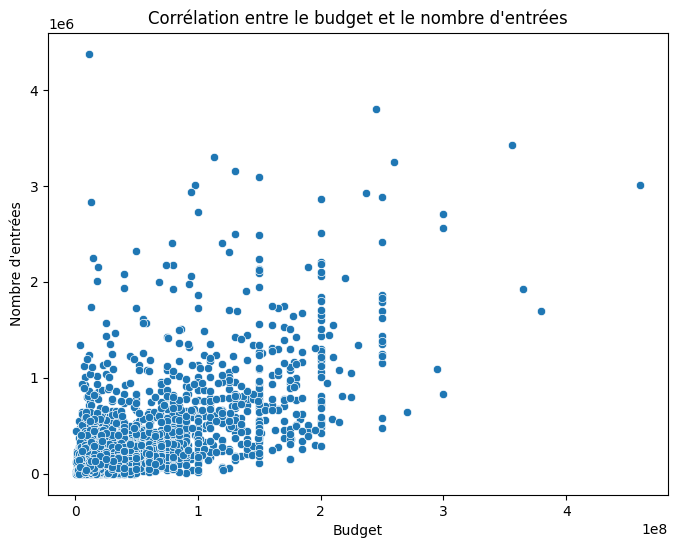

In [155]:
# Visualisation de la corrélation entre le budget et le nombre d'entrées
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='entries', data=df)
plt.xlabel('Budget')
plt.ylabel('Nombre d\'entrées')
plt.title('Corrélation entre le budget et le nombre d\'entrées')
plt.show()

# **Date**

## Nombre d'entrées en fonctions des mois de chaque année

### 2000 à 2007

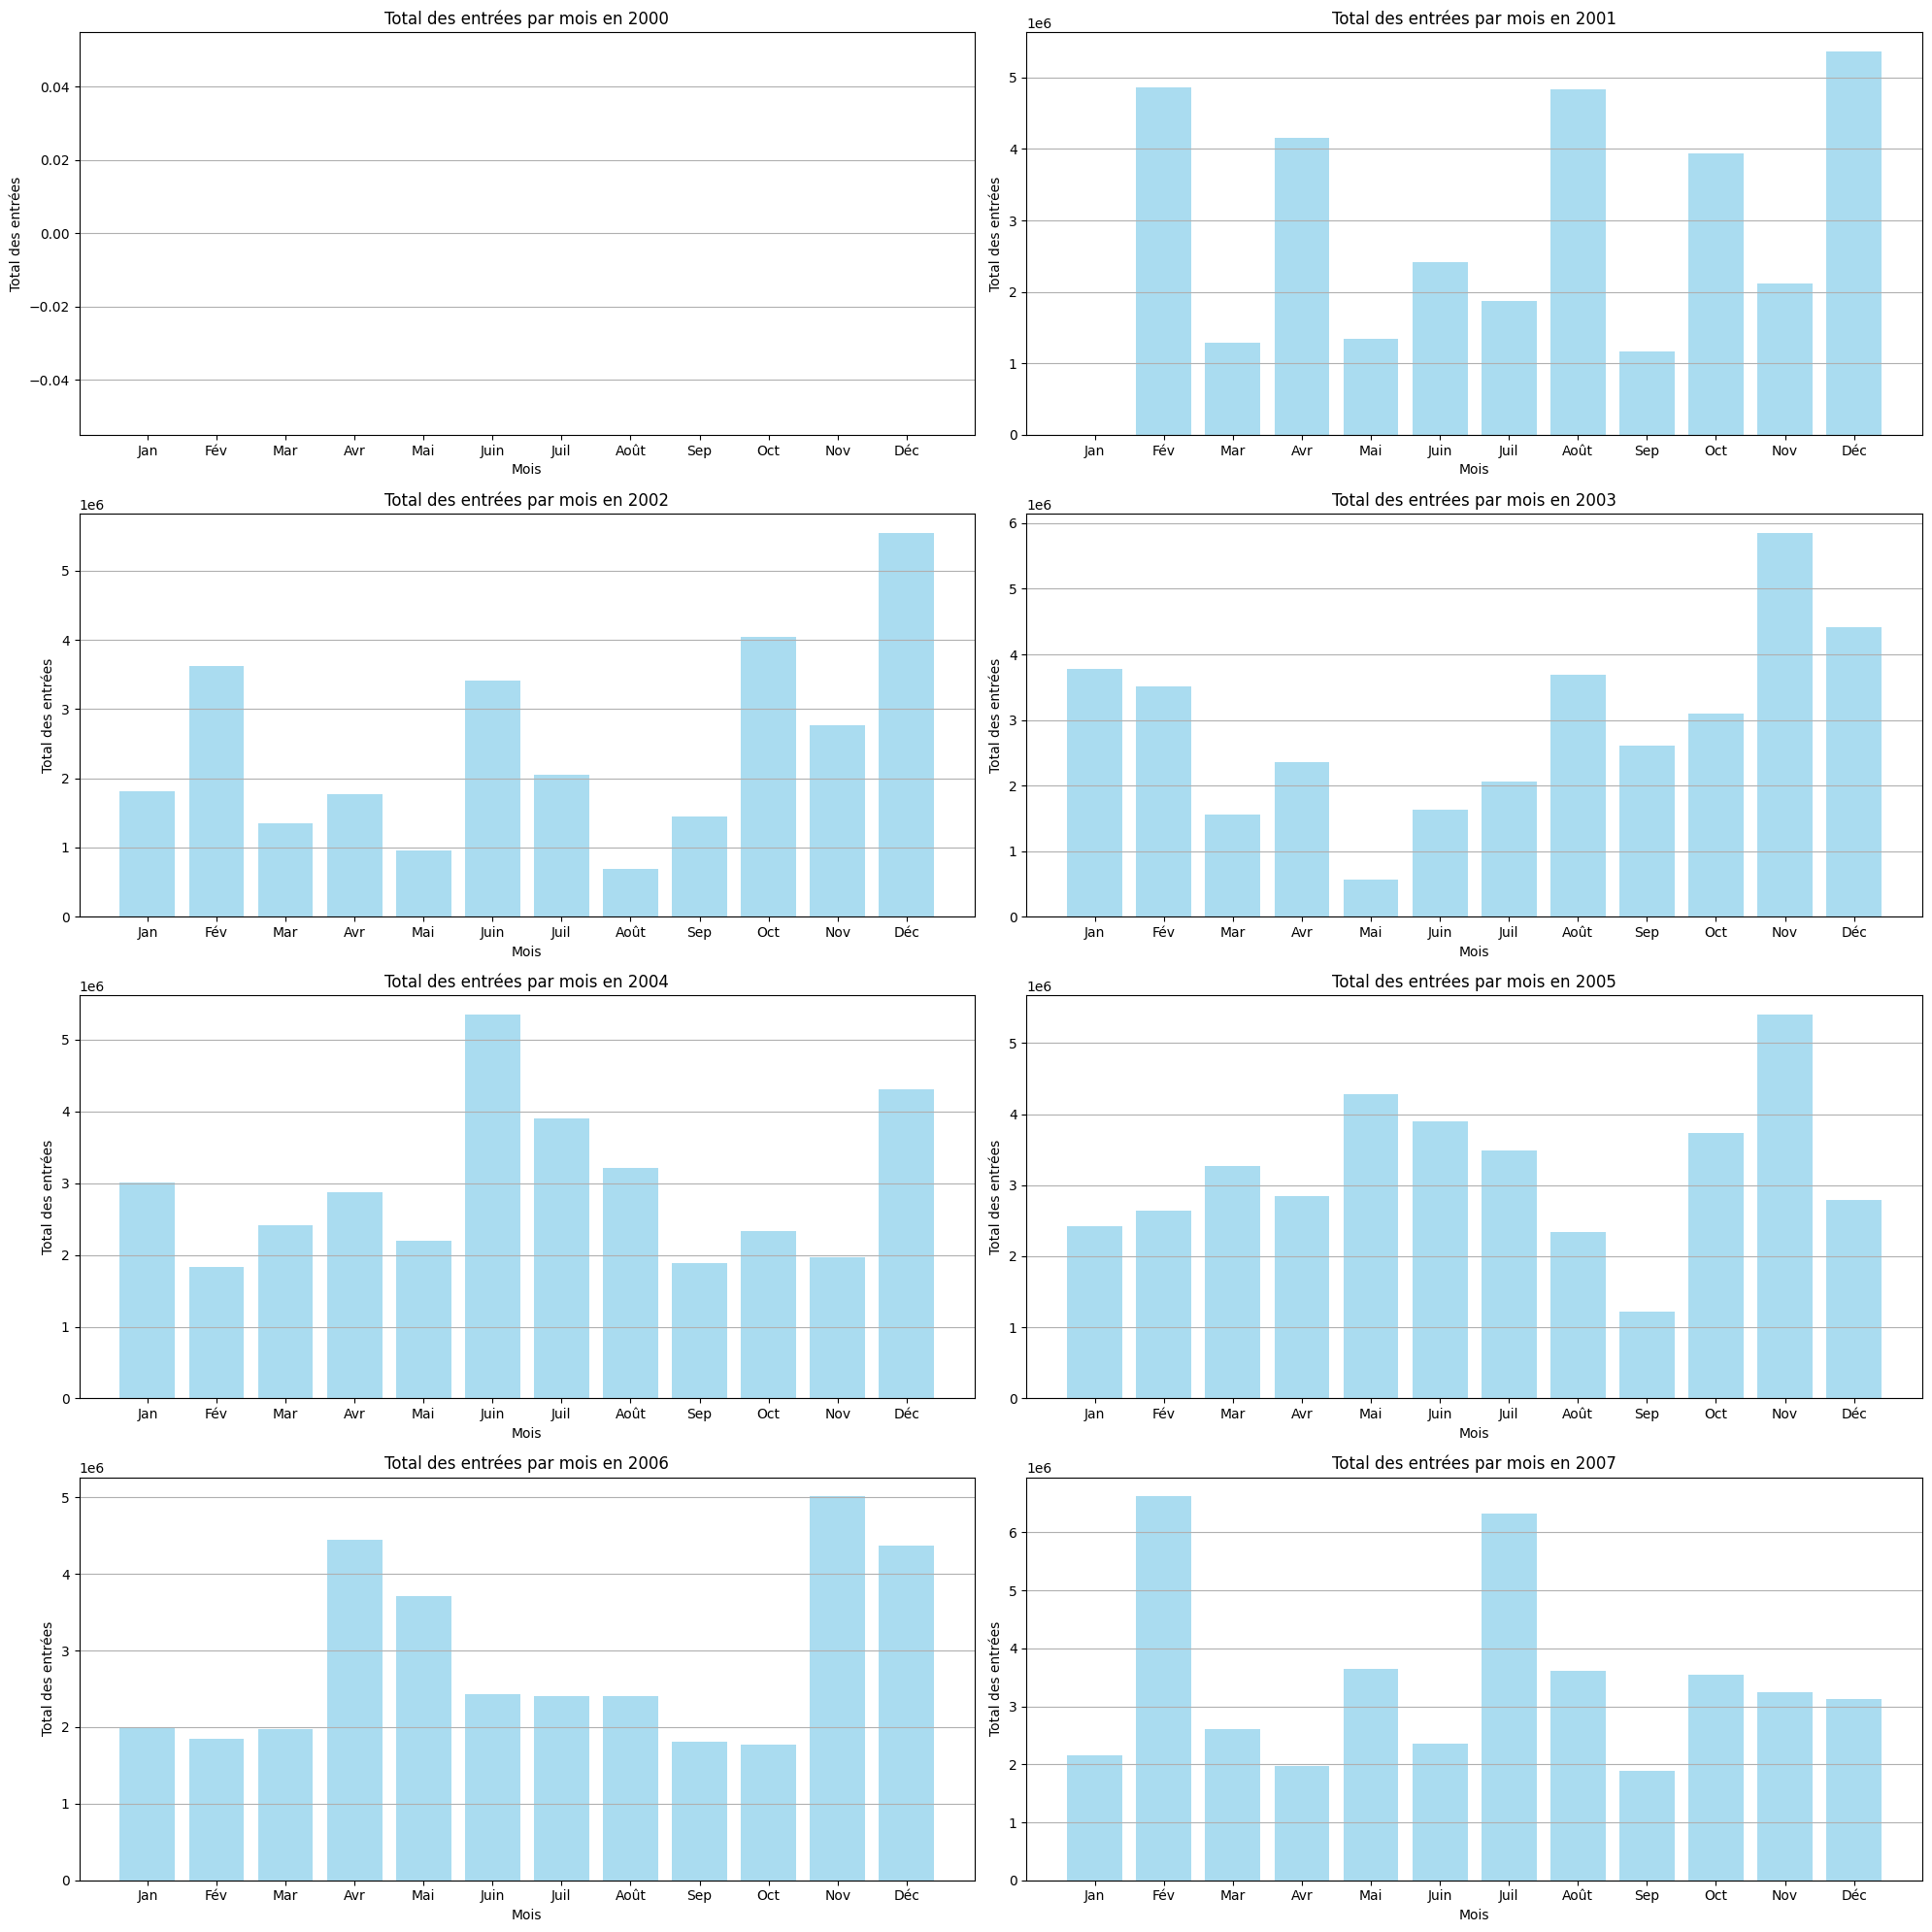

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la colonne 'date' en format datetime pour manipuler les dates
df['date'] = pd.to_datetime(df['date'])

# Extraire le mois et l'année dans deux nouvelles colonnes
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Obtenir la liste des années que vous souhaitez analyser (par exemple, 2022 et 2023)
years_to_analyze = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007]

# Créer une grille de sous-graphiques en fonction du nombre d'années sélectionnées
nrows = (len(years_to_analyze) + 1) // 2
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(20, 5 * nrows))

# Boucle sur chaque année sélectionnée pour tracer les sous-graphiques
for i, year in enumerate(years_to_analyze):
    data_year = df[df['year'] == year]
    monthly_entries = data_year.groupby('month')['entries'].sum()
    
    # Gestion du cas où il n'y a qu'un seul sous-graphique
    if nrows == 1:
        ax = axs[i % 2]
    else:
        ax = axs[i // 2, i % 2]
    
    # Tracer les totaux des entrées pour chaque année dans le sous-graphique
    months_with_data = monthly_entries.index
    all_months = range(1, 13)
    empty_months = list(set(all_months) - set(months_with_data))
    all_months_labels = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
    
    ax.bar(all_months, [monthly_entries.get(month, 0) for month in all_months], color='skyblue', alpha=0.7)
    
    # Personnaliser le sous-graphique
    ax.set_xticks(all_months)
    ax.set_xticklabels([all_months_labels[month - 1] for month in all_months])
    ax.set_xlabel('Mois')
    ax.set_ylabel('Total des entrées')
    ax.set_title(f'Total des entrées par mois en {year}')
    ax.grid(axis='y')

# Ajuster les espacements entre les sous-graphiques pour une meilleure lisibilité
plt.tight_layout()

# Afficher la figure avec les sous-graphiques
plt.show()

### 2008 à 2015

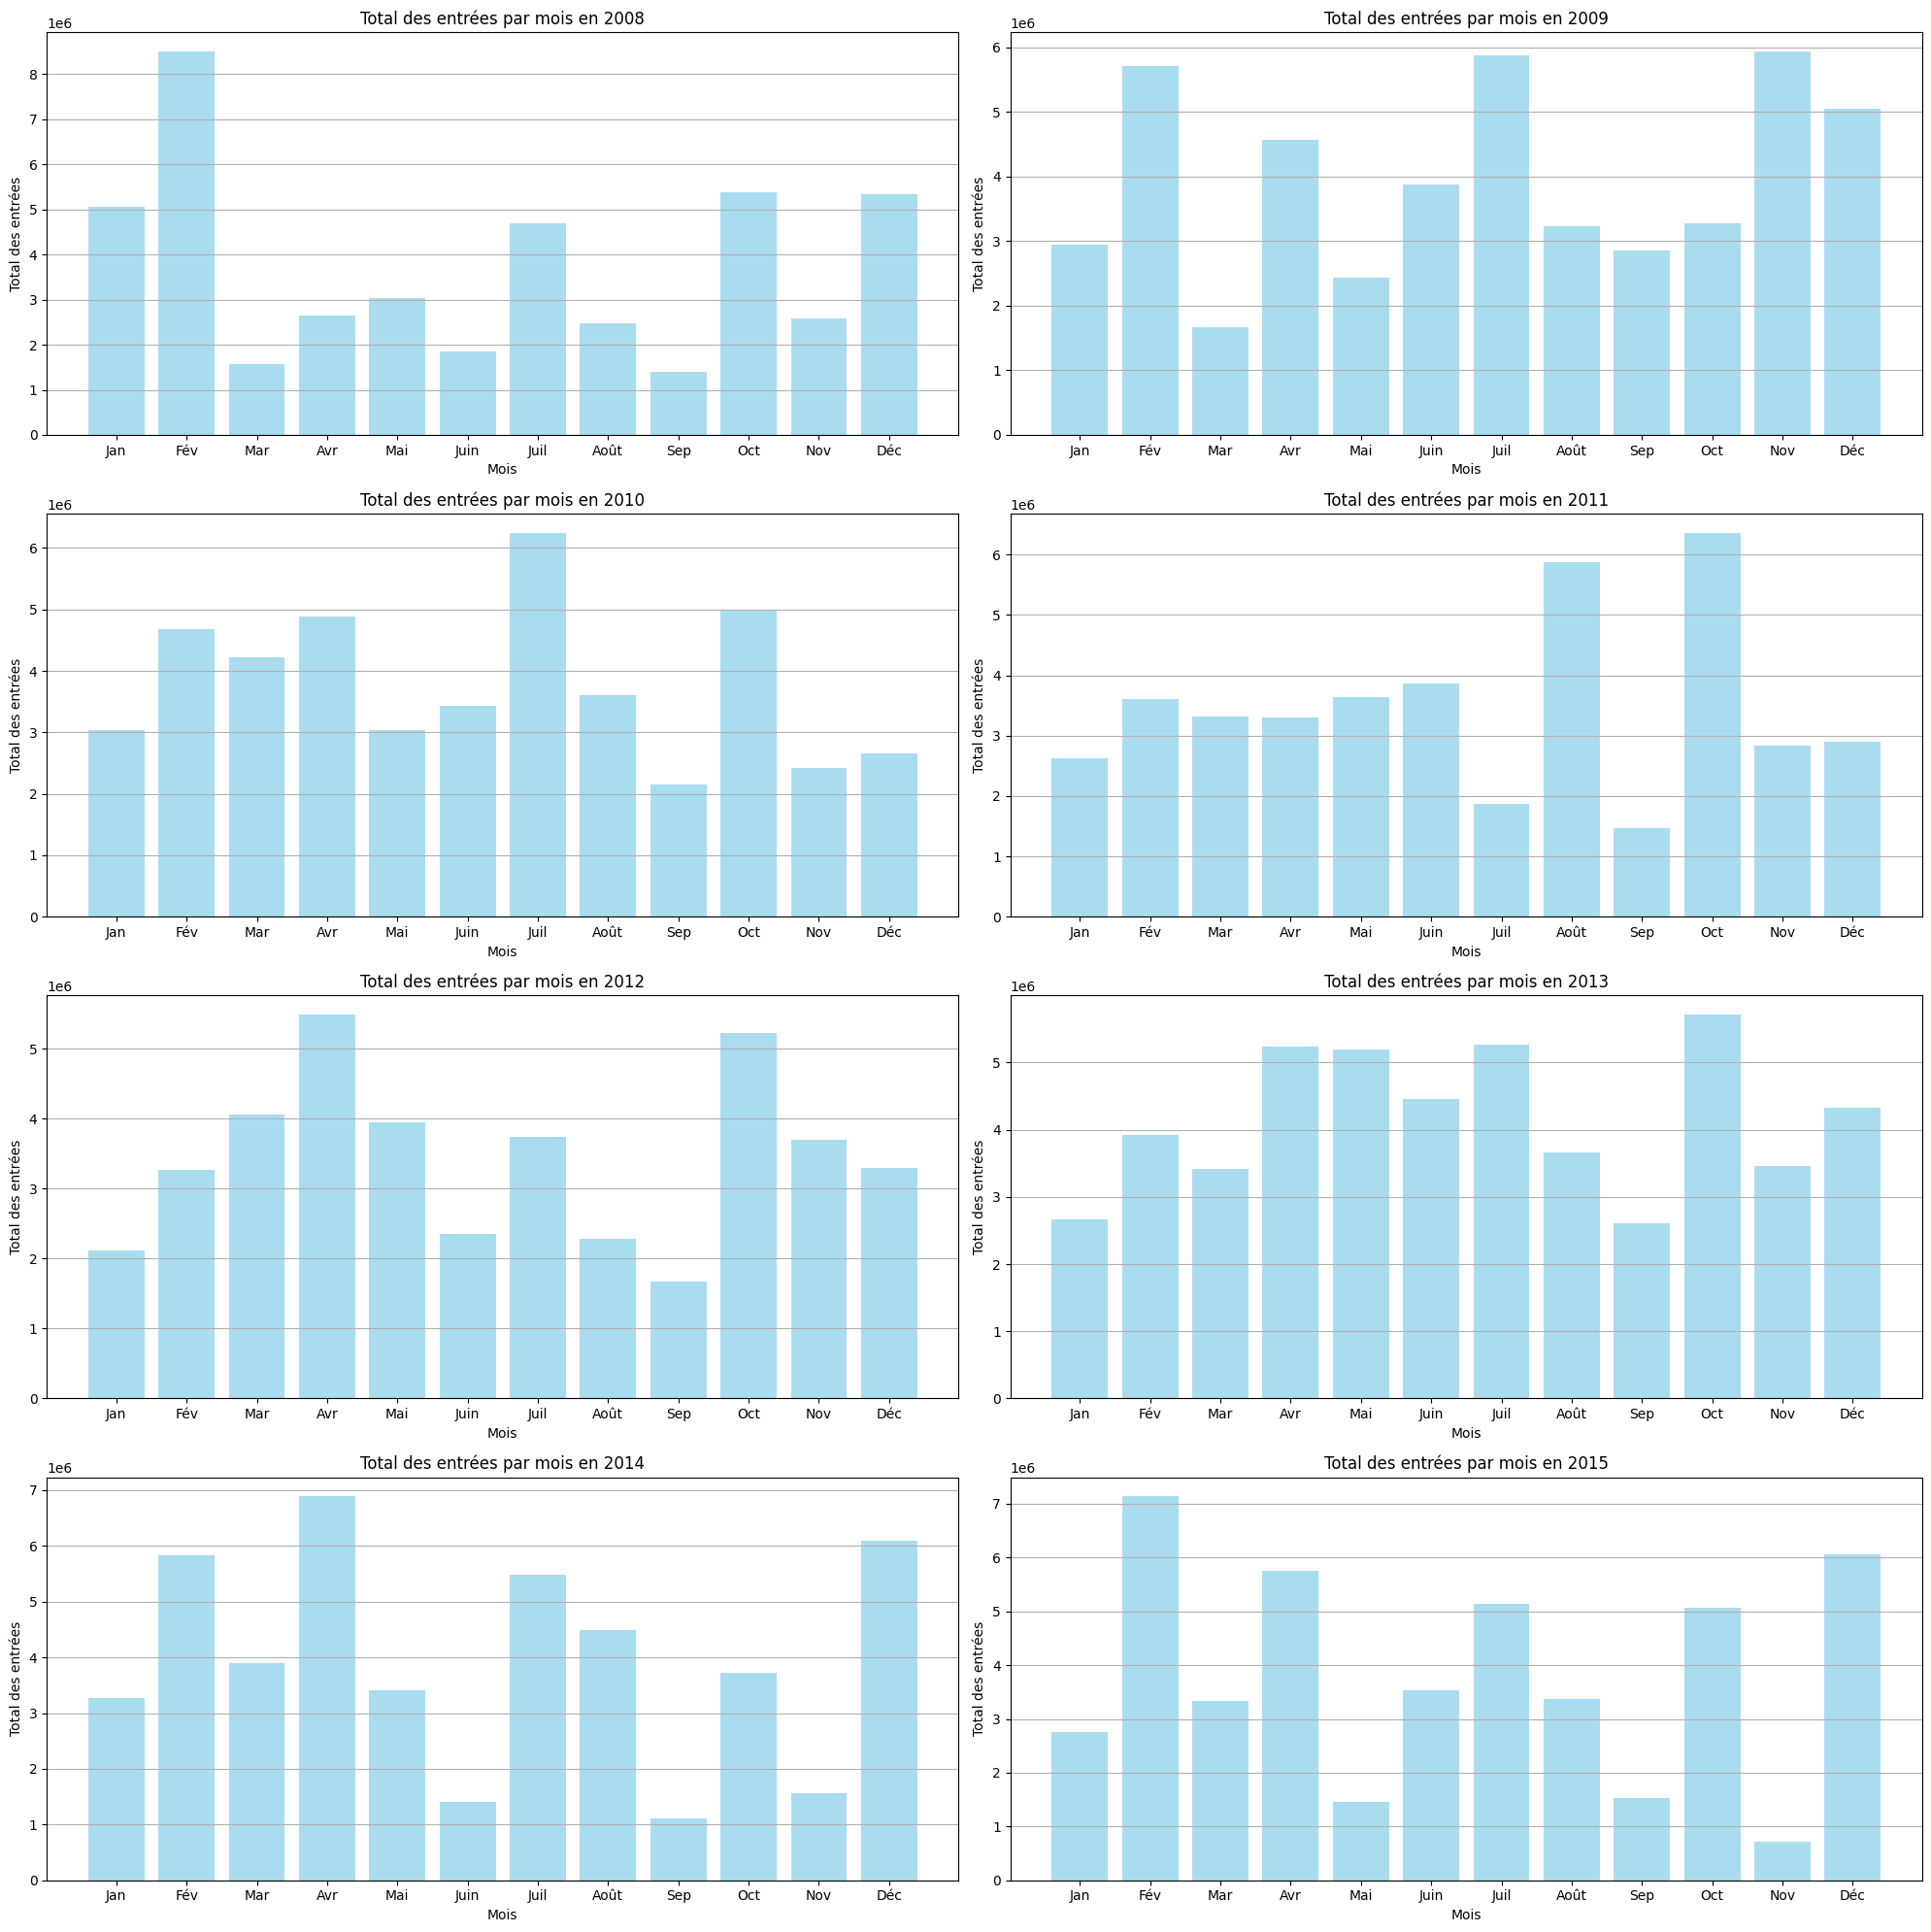

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la colonne 'date' en format datetime pour manipuler les dates
df['date'] = pd.to_datetime(df['date'])

# Extraire le mois et l'année dans deux nouvelles colonnes
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Obtenir la liste des années que vous souhaitez analyser (par exemple, 2022 et 2023)
years_to_analyze = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

# Créer une grille de sous-graphiques en fonction du nombre d'années sélectionnées
nrows = (len(years_to_analyze) + 1) // 2
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(20, 5 * nrows))

# Boucle sur chaque année sélectionnée pour tracer les sous-graphiques
for i, year in enumerate(years_to_analyze):
    data_year = df[df['year'] == year]
    monthly_entries = data_year.groupby('month')['entries'].sum()
    
    # Gestion du cas où il n'y a qu'un seul sous-graphique
    if nrows == 1:
        ax = axs[i % 2]
    else:
        ax = axs[i // 2, i % 2]
    
    # Tracer les totaux des entrées pour chaque année dans le sous-graphique
    months_with_data = monthly_entries.index
    all_months = range(1, 13)
    empty_months = list(set(all_months) - set(months_with_data))
    all_months_labels = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
    
    ax.bar(all_months, [monthly_entries.get(month, 0) for month in all_months], color='skyblue', alpha=0.7)
    
    # Personnaliser le sous-graphique
    ax.set_xticks(all_months)
    ax.set_xticklabels([all_months_labels[month - 1] for month in all_months])
    ax.set_xlabel('Mois')
    ax.set_ylabel('Total des entrées')
    ax.set_title(f'Total des entrées par mois en {year}')
    ax.grid(axis='y')

# Ajuster les espacements entre les sous-graphiques pour une meilleure lisibilité
plt.tight_layout()

# Afficher la figure avec les sous-graphiques
plt.show()

### De 2016 à 2023

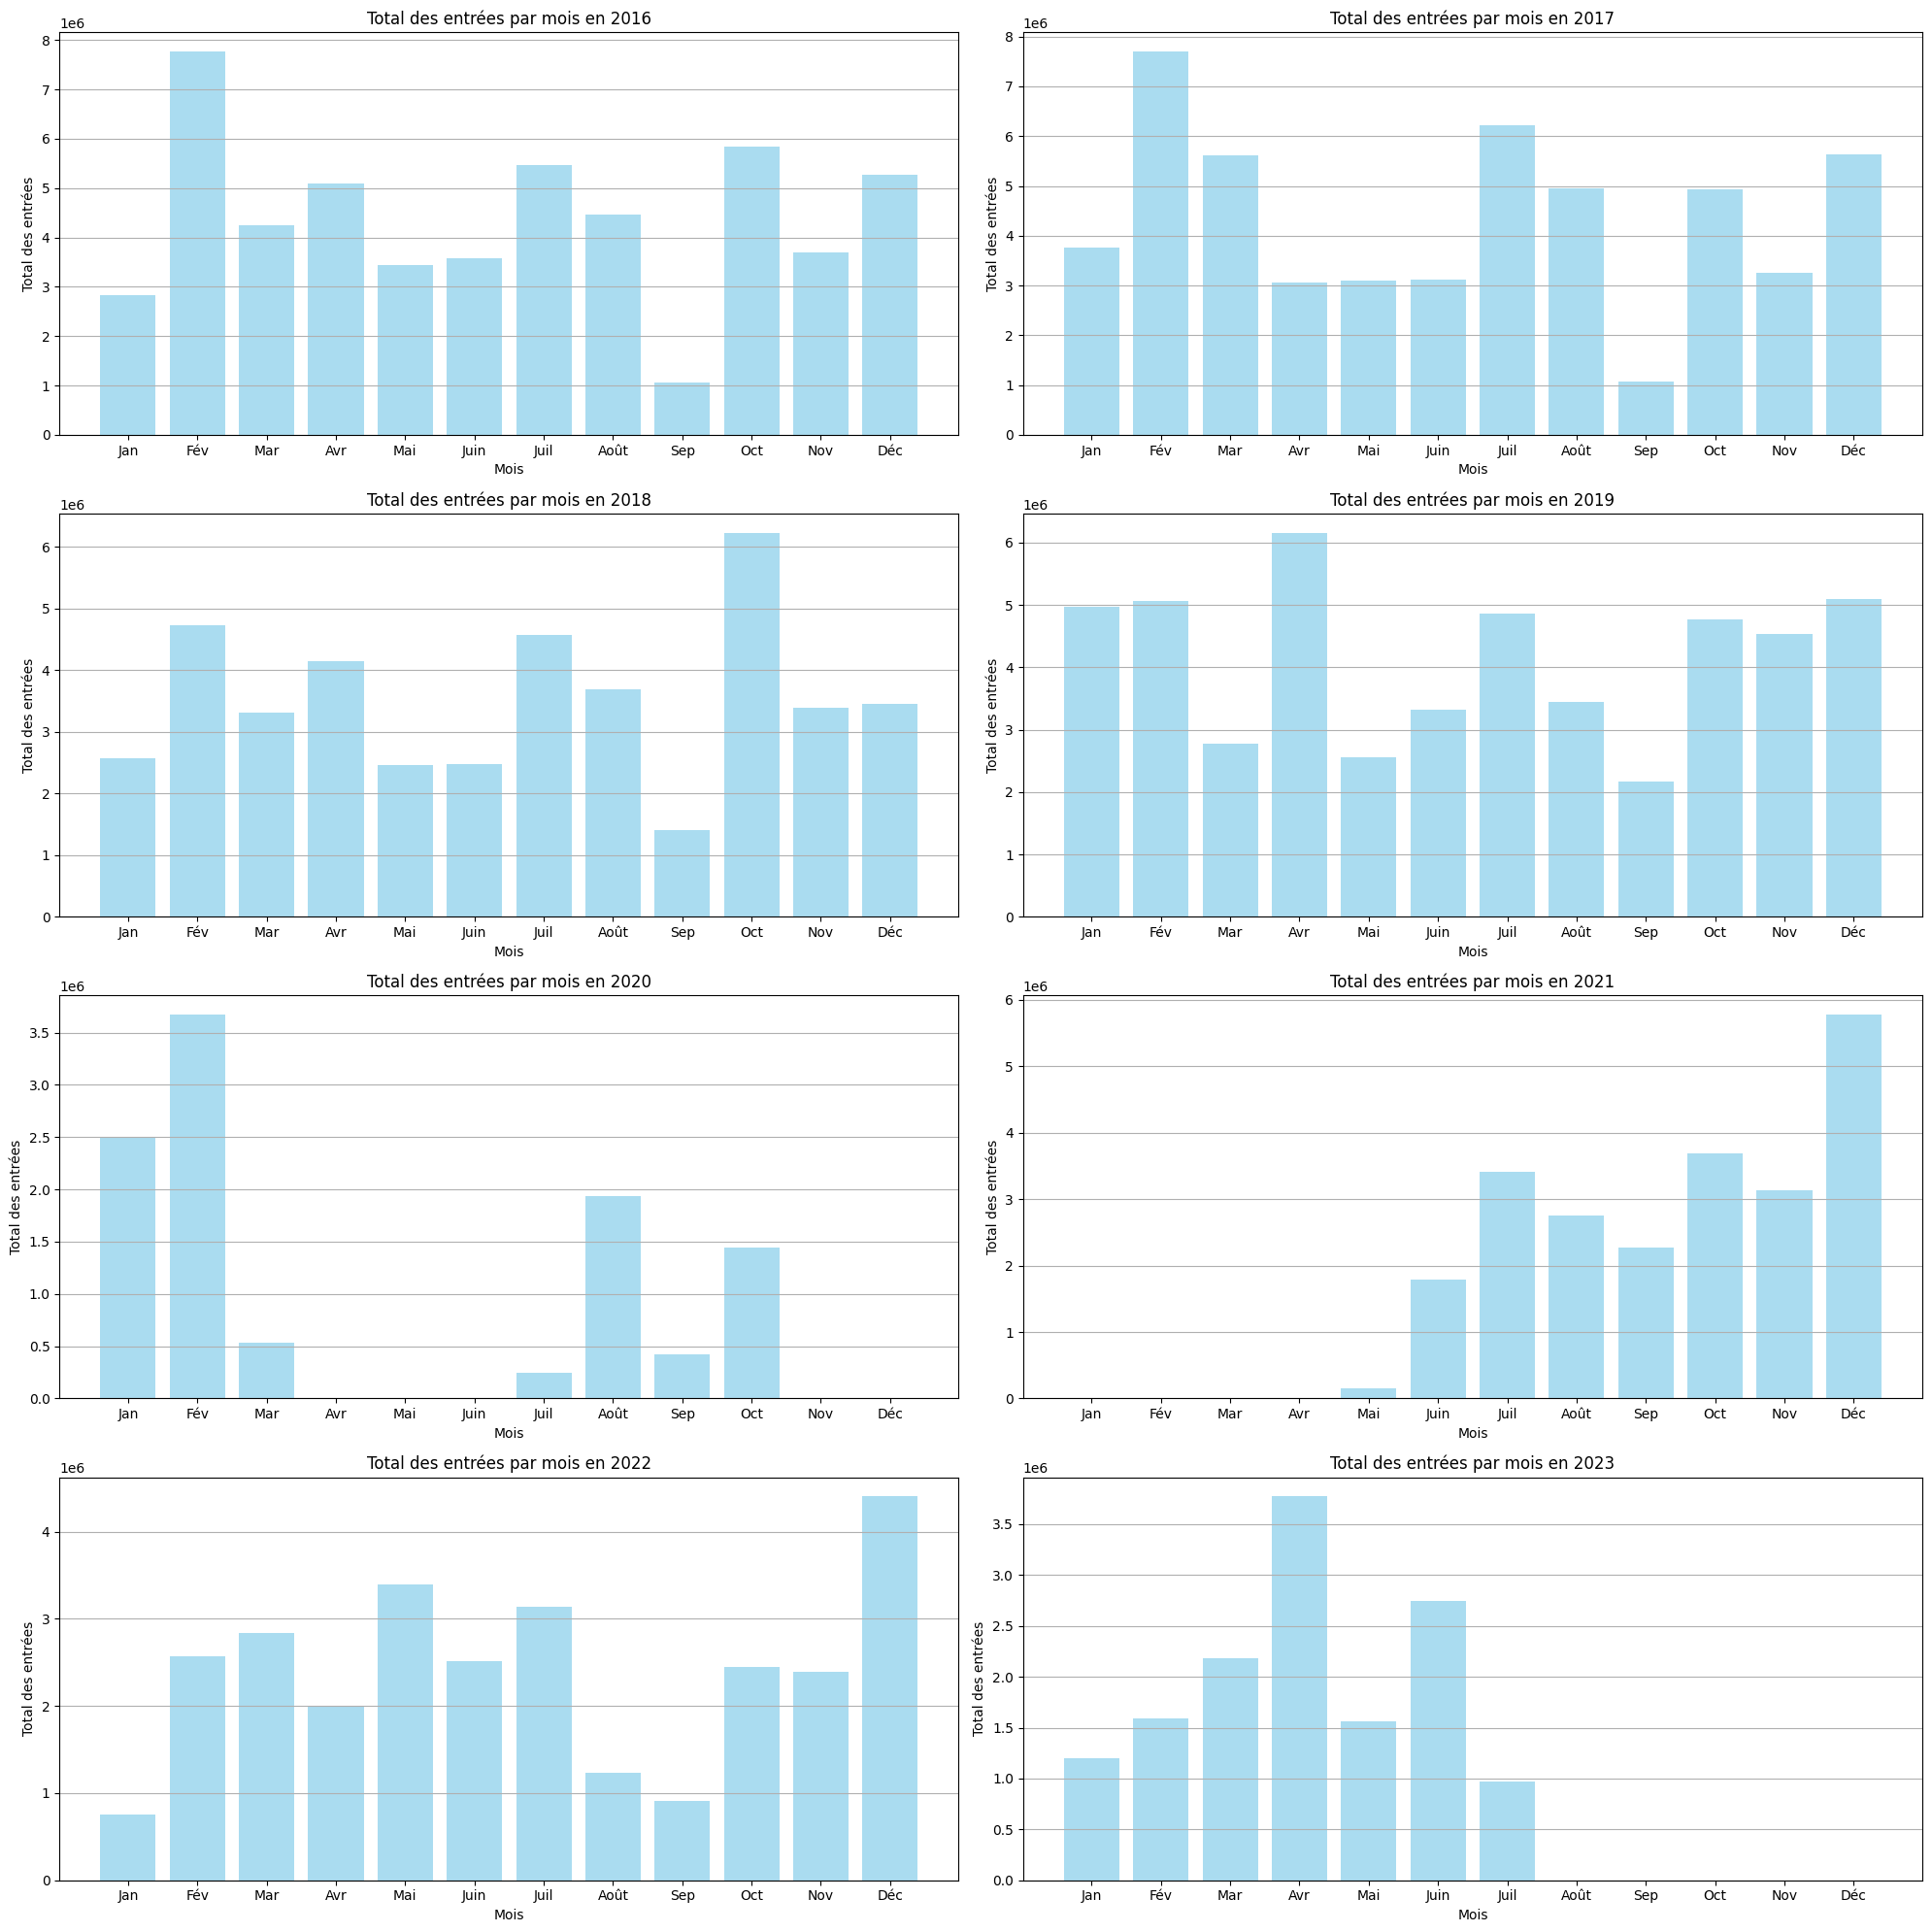

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la colonne 'date' en format datetime pour manipuler les dates
df['date'] = pd.to_datetime(df['date'])

# Extraire le mois et l'année dans deux nouvelles colonnes
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Obtenir la liste des années que vous souhaitez analyser (par exemple, 2022 et 2023)
years_to_analyze = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Créer une grille de sous-graphiques en fonction du nombre d'années sélectionnées
nrows = (len(years_to_analyze) + 1) // 2
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(20, 5 * nrows))

# Boucle sur chaque année sélectionnée pour tracer les sous-graphiques
for i, year in enumerate(years_to_analyze):
    data_year = df[df['year'] == year]
    monthly_entries = data_year.groupby('month')['entries'].sum()
    
    # Gestion du cas où il n'y a qu'un seul sous-graphique
    if nrows == 1:
        ax = axs[i % 2]
    else:
        ax = axs[i // 2, i % 2]
    
    # Tracer les totaux des entrées pour chaque année dans le sous-graphique
    months_with_data = monthly_entries.index
    all_months = range(1, 13)
    empty_months = list(set(all_months) - set(months_with_data))
    all_months_labels = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
    
    ax.bar(all_months, [monthly_entries.get(month, 0) for month in all_months], color='skyblue', alpha=0.7)
    
    # Personnaliser le sous-graphique
    ax.set_xticks(all_months)
    ax.set_xticklabels([all_months_labels[month - 1] for month in all_months])
    ax.set_xlabel('Mois')
    ax.set_ylabel('Total des entrées')
    ax.set_title(f'Total des entrées par mois en {year}')
    ax.grid(axis='y')

# Ajuster les espacements entre les sous-graphiques pour une meilleure lisibilité
plt.tight_layout()

# Afficher la figure avec les sous-graphiques
plt.show()
